# 3. DECISION TREE REGRESSOR MODEL

## OBJECTIVE:

## <span style = "color:pink" > Develop a web application that, shows the percentage growth in property values (€/m2), by area. With heat maps and confidence levels; for decicions-making regarding, and investment in real estate.

In [1]:
import utils as eda
import pandas as pd
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator
from typing import Tuple
from sklearn.pipeline import Pipeline
import joblib
import os
training_data = pd.read_csv("training_data.csv")
testing_data = pd.read_csv("testing_data.csv")
anonymous_data = pd.read_csv("anonymous_data.csv")

In [2]:
df_cleaned = pd.read_csv("cleaned_data.csv")

## 3.0. Features scaling:

In [3]:
training_scaled, testing_scaled, anonymous_scaled, scaler = eda.scale_datasets(training_data, testing_data, anonymous_data)

In [4]:
testing_scaled

,Unnamed: 0,name,year,precio
0,0.23,0.24,0.13,0.26
1,0.24,0.24,0.25,0.36
2,0.24,0.24,0.26,0.36
3,0.62,0.65,0.24,0.30
4,0.38,0.35,0.84,0.41
...,...,...,...,...
272,0.73,0.76,0.12,0.20
273,0.70,0.71,0.57,0.49
274,0.03,0.00,0.63,0.18
275,0.53,0.53,0.50,0.25


## 3.1. Regression algorithm selection:

In [5]:
X_train_sc = training_scaled.drop(columns=["precio"])
y_train_sc = training_scaled["precio"]

In [6]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
X_train_sc, X_val, y_train_sc, y_val = train_test_split(X_train_sc, y_train_sc, test_size=0.2, random_state=42)
models, predictions = reg.fit(X_train_sc, X_val, y_train_sc, y_val)

  0%|          | 0/42 [00:00<?, ?it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 664, number of used features: 3
[LightGBM] [Info] Start training from score 0.340039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [7]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.98,0.99,0.03,0.10
RandomForestRegressor,0.98,0.98,0.03,0.17
LGBMRegressor,0.98,0.98,0.03,0.03
ExtraTreeRegressor,0.98,0.98,0.03,0.01
BaggingRegressor,0.98,0.98,0.03,0.05
DecisionTreeRegressor,0.98,0.98,0.03,0.01
ExtraTreesRegressor,0.97,0.98,0.03,0.12
HistGradientBoostingRegressor,0.97,0.97,0.04,0.10
GradientBoostingRegressor,0.94,0.94,0.05,0.09


<span style= "color:yellow"> The best one model is DecisionTreeRegressor, it took less time than others, and can obtain the best scores too.

In [8]:
model = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 5, random_state = 42)
model.fit(X_train_sc, y_train_sc)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


## 3.2. Visualising DecisionTreeRegressor

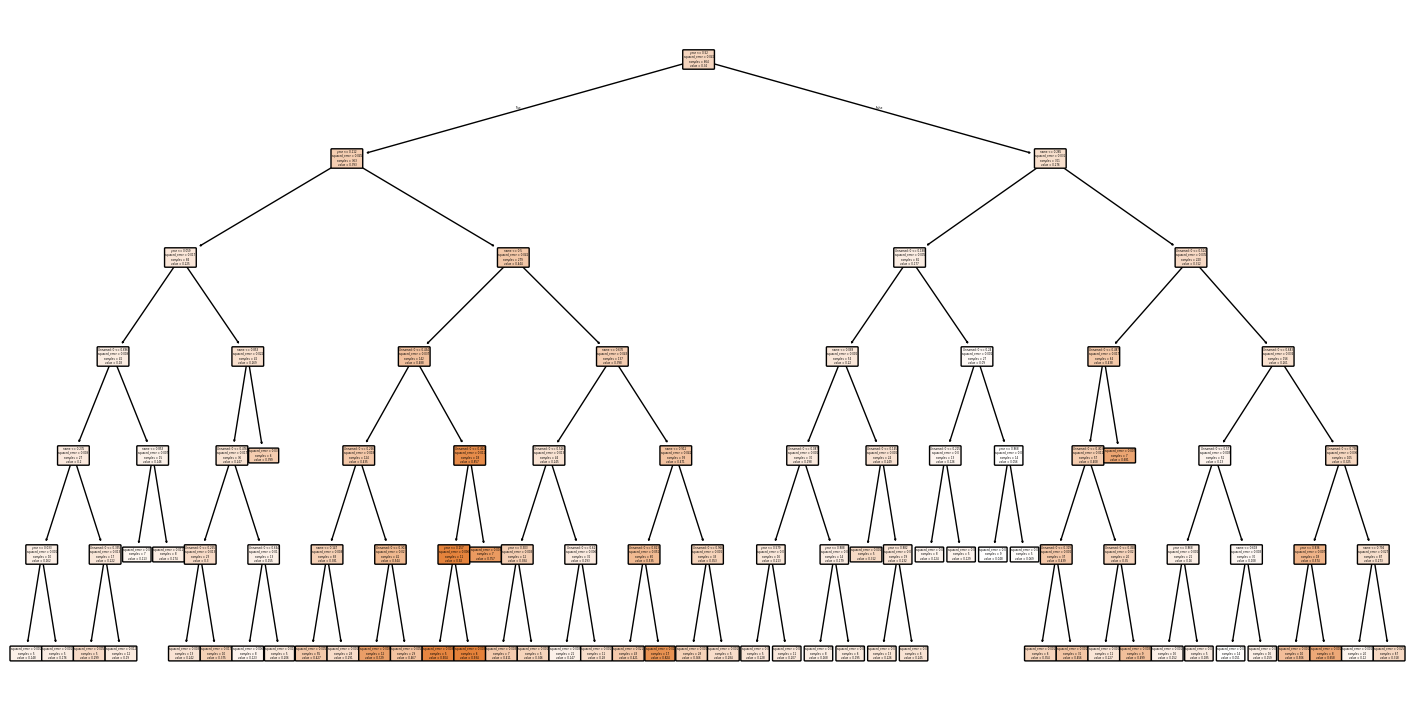

In [9]:
plt.figure(figsize = (18, 9))
plot_tree(model, feature_names = X_train_sc.columns, filled = True, rounded = True)
plt.show()

In [10]:
text_representation = export_text(model, feature_names = list(X_train_sc.columns))
print(text_representation)

|--- year <= 0.52
|   |--- year <= 0.11
|   |   |--- year <= 0.06
|   |   |   |--- Unnamed: 0 <= 0.70
|   |   |   |   |--- name <= 0.24
|   |   |   |   |   |--- year <= 0.03
|   |   |   |   |   |   |--- value: [0.15]
|   |   |   |   |   |--- year >  0.03
|   |   |   |   |   |   |--- value: [0.18]
|   |   |   |   |--- name >  0.24
|   |   |   |   |   |--- Unnamed: 0 <= 0.34
|   |   |   |   |   |   |--- value: [0.30]
|   |   |   |   |   |--- Unnamed: 0 >  0.34
|   |   |   |   |   |   |--- value: [0.19]
|   |   |   |--- Unnamed: 0 >  0.70
|   |   |   |   |--- name <= 0.85
|   |   |   |   |   |--- value: [0.11]
|   |   |   |   |--- name >  0.85
|   |   |   |   |   |--- value: [0.17]
|   |   |--- year >  0.06
|   |   |   |--- name <= 0.85
|   |   |   |   |--- Unnamed: 0 <= 0.48
|   |   |   |   |   |--- Unnamed: 0 <= 0.25
|   |   |   |   |   |   |--- value: [0.24]
|   |   |   |   |   |--- Unnamed: 0 >  0.25
|   |   |   |   |   |   |--- value: [0.38]
|   |   |   |   |--- Unnamed: 0 >  0.48
| 

# 3.3. Model predictions and metrics

In [11]:
X_test_sc = testing_scaled.drop(columns=["precio"])
y_test_sc = testing_scaled["precio"]

In [12]:
y_pred_train = model.predict(X_train_sc)
y_pred_test = model.predict(X_test_sc)

In [13]:
X_test_sc = testing_scaled.drop(columns=["precio"])
y_test_sc = testing_scaled["precio"]

In [14]:
X_anonymous_sc = anonymous_scaled.drop(columns=["precio"])
y_anonymous_sc = anonymous_scaled["precio"]

In [15]:
y_pred_train = model.predict(X_train_sc)
y_pred_test = model.predict(X_test_sc)
y_pred_anonymous = model.predict(X_anonymous_sc)

In [16]:
metrics_df = eda.calculate_metrics(y_train_sc, y_pred_train, y_test_sc, y_pred_test)
metrics_df

,MAE,MAPE,R2
Train,0.06,1287741523793.25,0.84
Test,0.07,0.38,0.71
Difference,0.01,1287741523792.87,0.13


## 3.4. Retraining

In [17]:
X_final = pd.concat([X_train_sc, X_test_sc, X_anonymous_sc])
y_final = pd.concat([y_train_sc, y_test_sc, y_anonymous_sc])

In [18]:
scaler = MinMaxScaler()
X_final_scaled = pd.DataFrame(scaler.fit_transform(X_final), columns=X_final.columns)
X_final_scaled

,Unnamed: 0,name,year
0,0.60,0.59,0.79
1,0.63,0.65,0.28
2,0.14,0.12,0.45
3,0.23,0.24,0.12
4,0.36,0.35,0.57
...,...,...,...
1214,0.40,0.41,0.28
1215,0.14,0.12,0.59
1216,0.25,0.24,0.57
1217,0.71,0.71,0.70


## 3.5.

In [19]:
class HousingGrowthPipeline(BaseEstimator):
    def __init__(self, model, base_df):
        self.model = model
        self.base_df = base_df
    def predict(self, future_years: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        last_year = pd.to_datetime(self.base_df["year"]).dt.year.max()
        predictions = []
        for year_offset in future_years:
            future_year = last_year + year_offset
            avg_price = self.base_df["precio"].mean()
            X_future = np.array([[future_year, avg_price]])
            pred = self.model.predict(X_future)[0]
            predictions.append(pred)
        predictions = np.array(predictions)
        confidence = 1 / (1 + 0.05 * future_years)
        return predictions, confidence
    def get_region_growth(self, years: int) -> pd.DataFrame:
        last_year = pd.to_datetime(self.base_df["year"]).dt.year.max()
        future_year = last_year + years
        region_predictions = []
        for region, group in self.base_df.groupby("comunidad"):
            last_row = group.iloc[-1]
            last_price = last_row["precio"]
            X_future = np.array([[future_year, last_price]])
            pred_price = self.model.predict(X_future)[0]
            growth = ((pred_price - last_price) / last_price) * 100
            region_predictions.append({"region": region, "growth": growth})
        return pd.DataFrame(region_predictions)


## 3.6. Pipeline export

In [20]:
pipeline = HousingGrowthPipeline(model = model, base_df = df_cleaned)

In [21]:
script_dir = os.getcwd()
model_dir = os.path.join(script_dir, "models")
os.makedirs(model_dir, exist_ok = True)
model_path = os.path.join(model_dir, "app_web_pipeline.pkl")
joblib.dump(pipeline, model_path)

['/workspaces/FINAL-PROJECT-ML-Wendy-2025-DS/src/models/app_web_pipeline.pkl']

In [22]:
print(" ✅ Model trained and saved successfully at:", model_path)
print(f" Model Accuracy on Test Set: {model.score(X_test_sc, y_test_sc) * 100:.2f}%")

 ✅ Model trained and saved successfully at: /workspaces/FINAL-PROJECT-ML-Wendy-2025-DS/src/models/app_web_pipeline.pkl
 Model Accuracy on Test Set: 70.74%
